LTI_IIR
================

Dieses Notebook zeigt wie man in Python mit IIR Filtern umgeht, deren Impulsantwort unendlich ist (daher der Name "Infinite Impulse Response" ...) und die daher nicht als Zahlenfolge abgelegt werden kann.

- Anlegen von Subplots
- Definition eines IIR-Filters über seine Koeffizienten
- Impulsantwort impz(), linear und logarithmisch
- filtere (= falte) Eingangssequenz mit Impulsantwort des IIR-Filters
  (unendlich ausgedehnt!) mit scipy.signal.lfilter()
- interpoliere Sequenz mit scipy.interpolate.interp1


In [1]:
from __future__ import division, print_function, unicode_literals

from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange,
                    linspace, zeros, ones)

import scipy.signal as sig
import scipy.interpolate as intp

import matplotlib.pyplot as plt
from matplotlib.pyplot import (figure, plot, stem, grid, xlabel, ylabel,
    subplot, title, clf, xlim, ylim)
#%matplotlib inline

import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)

import dsp_fpga_lib as dsp

In der folgenden Zelle berechnen wir die Impulsantwort des Filters und stellen sie linear und logarithmisch dar.

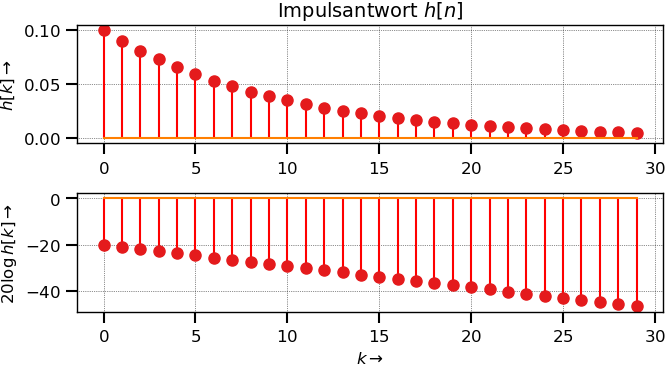

In [2]:
# -- Impulse response (lin / log) ---
f1 = 50; Ts = 5e-3 
n = arange(0, 50) # sample n
t = arange(0, 49., 0.1) # higher resolution
b = [0.1, 0]; a = [1, -0.9] # filter coefficients
# ->   H(z) = (0.1 z + 0) / (z - 0.9)
[h, k] = dsp.impz(b, a, N = 30) # -> h[k]
figure(1)
subplot(211)
stem(k, h, 'r', use_line_collection=True) # x[n], red stems
ylabel(r'$h[k] \rightarrow$')
title(r'Impulsantwort $h[n]$')
subplot(212)
stem(k, 20*log10(abs(h)), 'r', use_line_collection=True) 
xlabel(r'$k \rightarrow$')
ylabel(r'$20 \log\, h[k] \rightarrow$');
plt.tight_layout(True)

Aufgrund der unendlichen Impulsantwort kann man die Impulsantwort nicht mit Hilfe der Faltung berechnen, man nimmt `scipy.signal.lfilter(b,a,x)`. Der Plot zeigt, wie der Ausgang des Filters den Mittelwert 1.5 annimmt und noch eine geringe Restwelligkeit zu sehen ist.

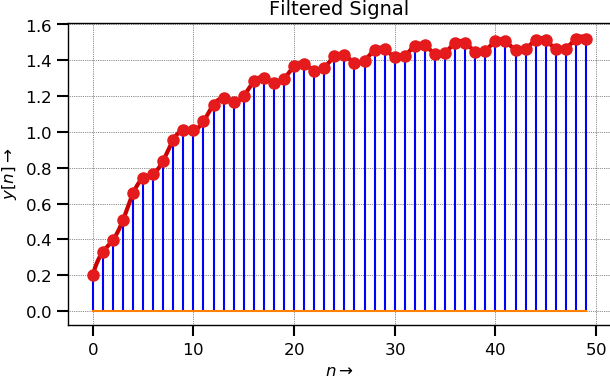

In [3]:
# ------- Filtered signal -------------
figure(2);
xn = 1.5 + 0.5*cos(2.0*pi*f1*n*Ts) # x[n]
yn = sig.lfilter(b,a,xn) #filter xn with h
f = intp.interp1d(n, yn, kind = 'cubic')
yt = f(t) # y(t), interpolated
plot(t, yt, color='#cc0000', linewidth=3) 
stem(n, yn, 'b', use_line_collection=True) # y[n]
xlabel(r'$n \rightarrow$'); grid(True)
ylabel(r'$y[n] \rightarrow$')
title('Filtered Signal')
plt.show()       # draw and show the plots

**Aufgaben:**
- Finden Sie heraus, wie die Funktion `impz()` funktioniert, sie ist in der Bibliothek `dsp_fpga_lib` definiert.
- Variieren Sie die Frequenz des Eingangssignals und beobachten Sie, wie das Ausgangssignal reagiert.

***
**Copyright**

(c) 2016 - 2020 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.